# Placement - DataAnalysis+Classification+Regression

# Data Analysis And Machine Learning on Campus Placement Data
1. Explatory Data Analysis
2. Prediction of wheather student gets placed or not (Binary Classification)
3. Determining characteristics affecting placement
4. Predition of Salary secured by a student (Regression)
5. Determining characteristics affecting salary

# Common Questions
1. Does GPA affect placement?
2. Does Higher Secondary School's Percentage still affect campus placement?
3. Is work experience required for securing good job?
4. What factor affect the salary?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [6]:
data = pd.read_csv("D:/7. JUL - DEC 2021/TEDP/Data Science Course/Placement_Data_Full_Class.csv")
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data.gender.value_counts()
# Almost double

M    139
F     76
Name: gender, dtype: int64

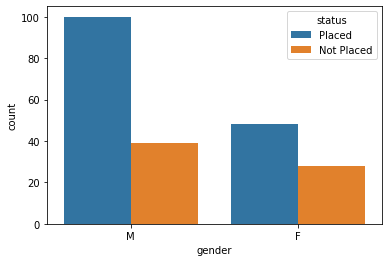

In [7]:
sns.countplot("gender", hue="status", data=data)
plt.show()

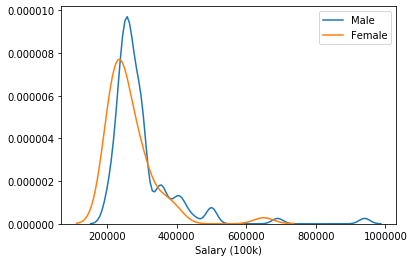

In [8]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

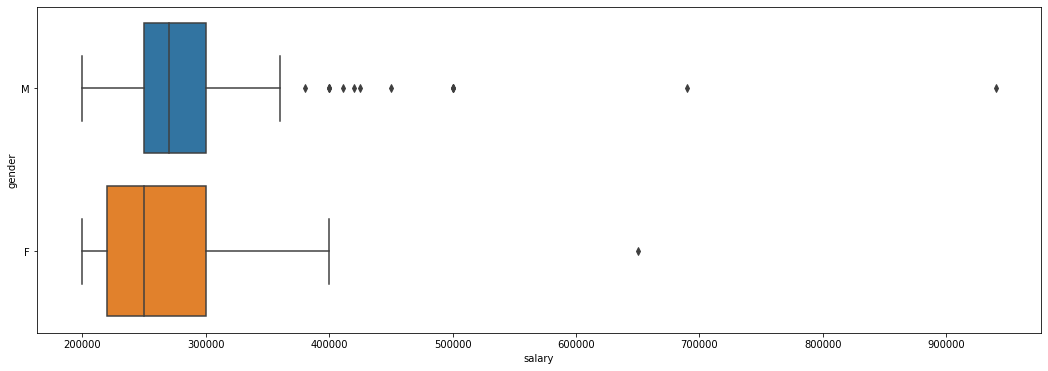

In [9]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

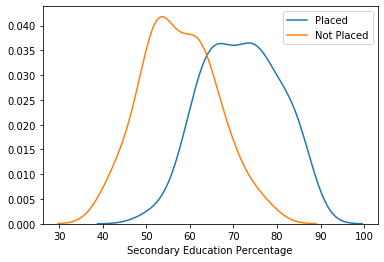

In [10]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

1. All students with Secondary Education Percentage above 90% are placed
2. All students with Secondary Education Percentage below 50% are not-placed
3. Students with good Secondary Education Percentage are placed on average.

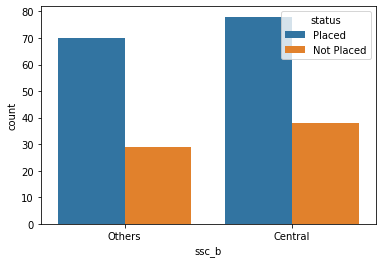

In [11]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

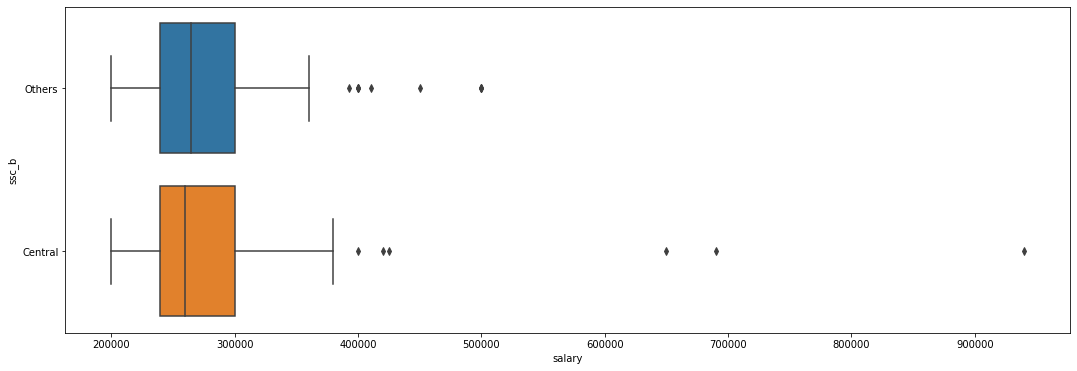

In [12]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers on both, but students from Central Board are getting the highly paid jobs.

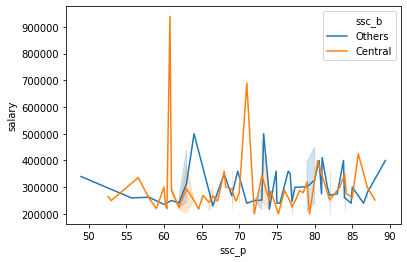

In [13]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

No specific pattern (correlation) between Secondary Education Percentage and Salary.
Board of Education is Not Affecting Salary

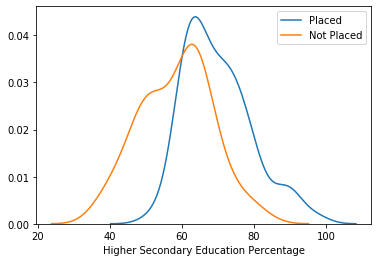

In [14]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

Overlap here too. More placements for percentage above 65%
Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

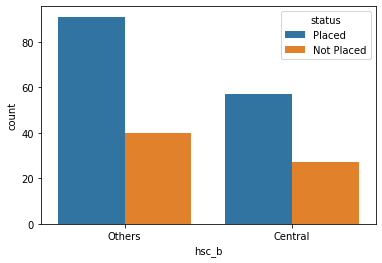

In [15]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

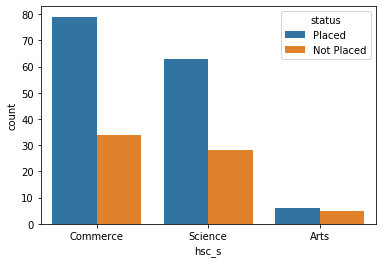

In [16]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

# Data Preprocessing

In [17]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [18]:
data.dtypes
# We have to encode gender,hsc_s, degree_t, workex, specialisation and status

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [19]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Problem Statement
Predicting If Students gets placed or not (Binary Classification Problem)
Predicting Salary of Student (Regression Problem)

In [20]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = data.copy()
data_reg = data.copy()

# Binary Classification Problem
Decision Tree Based Models
Using Decision Tree based Algorithm does not require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding

In [21]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [23]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9076923076923077

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.93      0.93      0.93        44

    accuracy                           0.91        65
   macro avg       0.89      0.89      0.89        65
weighted avg       0.91      0.91      0.91        65



In [27]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8769230769230769

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.88      0.95      0.91        44

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



In [30]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]
#Add Rows
for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

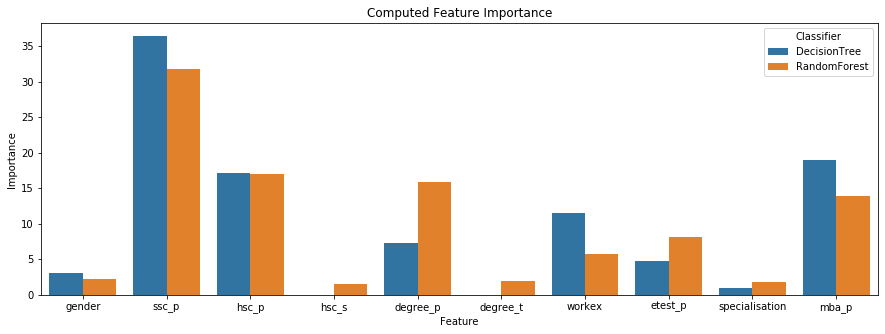

In [31]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

# Binary Classification with Logistic Regression
One Hot Encoding¶
Encoding Categorical Features

In [32]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

D:\Python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [33]:
#One-Hot Encoding
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
from sklearn.linear_model import LogisticRegression

In [35]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8307692307692308

# Prediction of Salary (Regression Analysis)¶

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [37]:
#dropping NaNs (in Salary)
data_reg.dropna(inplace=True)
#dropping Status = "Placed" column
data_reg.drop("status", axis=1, inplace=True)
data_reg.head()


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [38]:
#Seperating Depencent and Independent Vaiiables
y = data_reg["salary"] #Dependent Variable
X = data_reg.drop("salary", axis=1)
column_names = X.columns.values
#Scalizing between 0-1 (Normalization)
X_scaled = MinMaxScaler().fit_transform(X)

# Determining Least Significant Variable

The least significant variable is a variable which:

1. has the highest p-value
2. Removing it reduces R2 to lowest value compared to other features
3. Removing it has least increment in residuals-sum-of-squares (RSS)


Outliers' Removal

Feature Selecton cannot perform well in presence of outliers. Lets identy and remove outliers before proceding

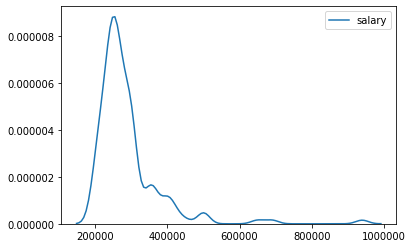

In [39]:
#PDF of Salary
sns.kdeplot(y)
plt.show()

In [40]:
#Selecting outliers
y[y > 400000]
# 9 records

4      425000.0
39     411000.0
53     450000.0
77     500000.0
95     420000.0
119    940000.0
150    690000.0
163    500000.0
174    500000.0
177    650000.0
Name: salary, dtype: float64

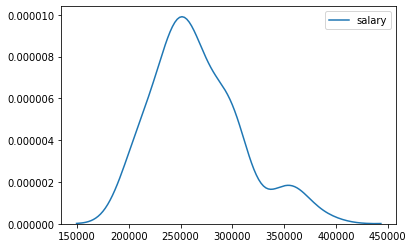

In [41]:
#Removing these Records from data
X_scaled = X_scaled[y < 400000]
y = y[y < 400000]
#PDF of Salary without outliers. Still skewed though
sns.kdeplot(y)
plt.show()

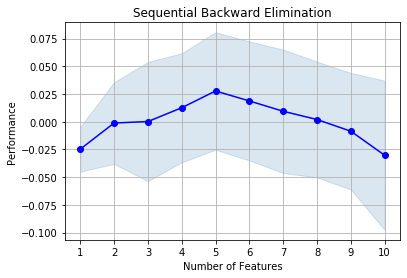

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(X_scaled, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()
#From Plot its clear that, many features actually decrease the performance

In [44]:
# Lets see the top 5 most significant features
top_n = 5
sfs.get_metric_dict()[top_n]
#Top N Features
top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

Most Significant 5 Features:
gender
hsc_s
degree_t
etest_p
mba_p


In [46]:
#Select these Features only
X_selected = X_scaled[: ,top_n_indices]
lin_reg = LinearRegression()
lin_reg.fit(X_selected, y)
y_pred = lin_reg.predict(X_selected)
print(f"MAE: {mean_absolute_error(y, y_pred)}")

MAE: 30630.128295211565
